In [2]:
import numpy as np
from numpy import linalg
from numpy import pi
from sympy import *
from sympy import factorint
from scipy.sparse import csr_matrix

import random
from random import sample
import pandas as pd
import math
from fractions import Fraction
import matplotlib.pyplot as plt
import pickle
from csv import reader

In [3]:
params = {'text.usetex' : True, 'font.size' : 20, 'font.family' : 'serif'}
plt.rcParams.update(params)
plt.rc('figure', figsize=(12, 6))


<BarContainer object of 74 artists>

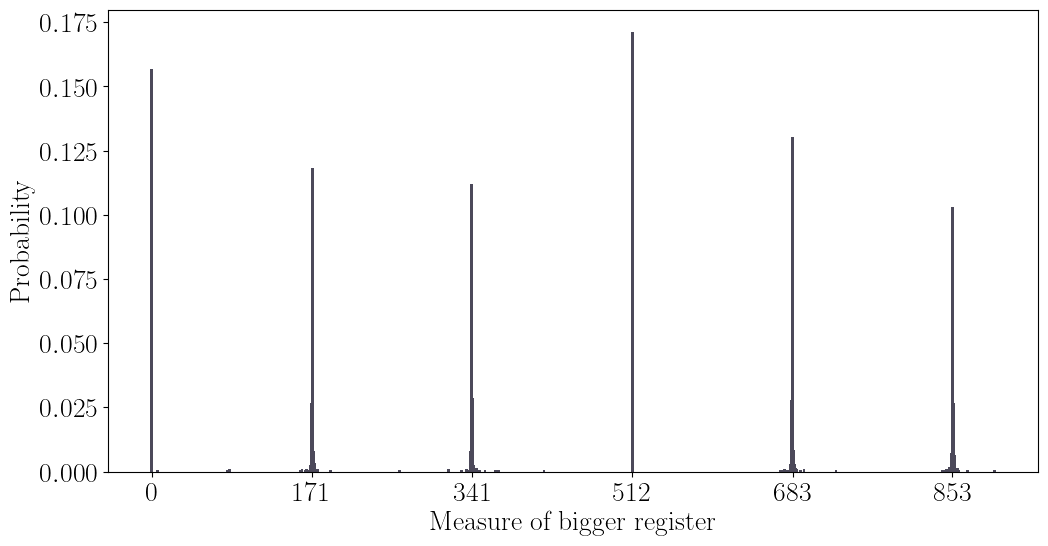

In [19]:
#N = 27 y = 8 r = 16 shots = 2048
params = {'text.usetex' : True, 'font.size' : 20, 'font.family' : 'serif'}
plt.rcParams.update(params)
plt.rc('figure', figsize=(12, 6))
fig = plt.figure(1, figsize=(12 ,6))
ax  = fig.add_subplot(111)

counts = {'0101100011': 1, '0110100010': 1, '0000000000': 321, '0010101001': 5, '1101001011': 1, '1101010101': 211, '0101010101': 229, '0100111100': 2,
 '1010101011': 267, '1101010110': 55, '0010101100': 16,'1000000000': 351, '0010101111': 2, '0010101011': 242, '1010101010': 57, '0101010110': 59,
 '0010101010': 55, '1101011000': 6, '1010110111': 2, '1101010111': 13, '001010011': 2, '0010101101': 7,
 '1101010100': 15, '1010011110': 1,
 '1101010000': 2,
 '1010100010': 2,
 '0101011101': 1,
 '0101011010': 3,
 '0010101110': 1,
 '1010100100': 1,
 '1101011010': 2,
 '0010101000': 1,
 '1101011100': 1,
 '1101011001': 1,
 '1010100110': 1,
 '0101010001': 1,
 '1010100111': 1,
 '0010100000': 2,
 '1110000010': 1,
 '0101010100': 16,
 '1010101100': 17,
 '0010111110': 1,
 '0101110001': 1,
 '0101001111': 2,
 '1101011011': 3,
 '1010101110': 3,
 '0101010010': 1,
 '1010101000': 6,
 '0101011001': 2,
 '0101010011': 4,
 '1010101101': 6,
 '1101001111': 2,
 '0010110001': 2,
 '0010100100': 1,
 '0101001010': 1,
 '0010100101': 2,
 '1101010011': 4,
 '1010110011': 1,
 '1101001101': 1,
 '0101010111': 5,
 '1010101001': 6,
 '1010101111': 2,
 '1101010010': 4,
 '0101011011': 1,
 '1010100101': 1,
 '1101100101': 1,
 '0101011000': 3, '1010100000': 1, '0010011110': 1, '1011011001': 1,
 '1010011110': 1,
 '1101010000': 2,
 '1010100010': 2,
 '0101011101': 1,
 '0101011010': 3,
 '0010101110': 1,
 '1010100100': 1,
 '1101011010': 2,
 '0010101000': 1,
 '1101011100': 1,
 '1101011001': 1,
 '1010100110': 1,
 '0101010001': 1,
 '1010100111': 1,
 '0000000110': 1, '0101101110': 1, '0001010001': 1, '0100001000': 1}

states = []
height = []
for key in counts:
    states.append(int(key, base = 2))
    height.append(counts[key])

for l in range(len(height)):
    height[l] = height[l]/ 2048

a = []
peaks =  {'1101010101': 211, '0101010101': 229, '0010101011': 242, '1010101011': 267, '0000000000': 321, '1000000000': 351}
for key1 in counts:
    for key2 in peaks:
        if key1 == key2:
            a.append(int(key1, base = 2))

ax.xaxis.set_ticks(a)
plt.xlabel('Measure of bigger register')
plt.ylabel('Probability')

plt.bar(states, height, width = 3, color = '#4C495A')
#plt.savefig('Useful_js_nondiv.pdf', format = 'pdf') 

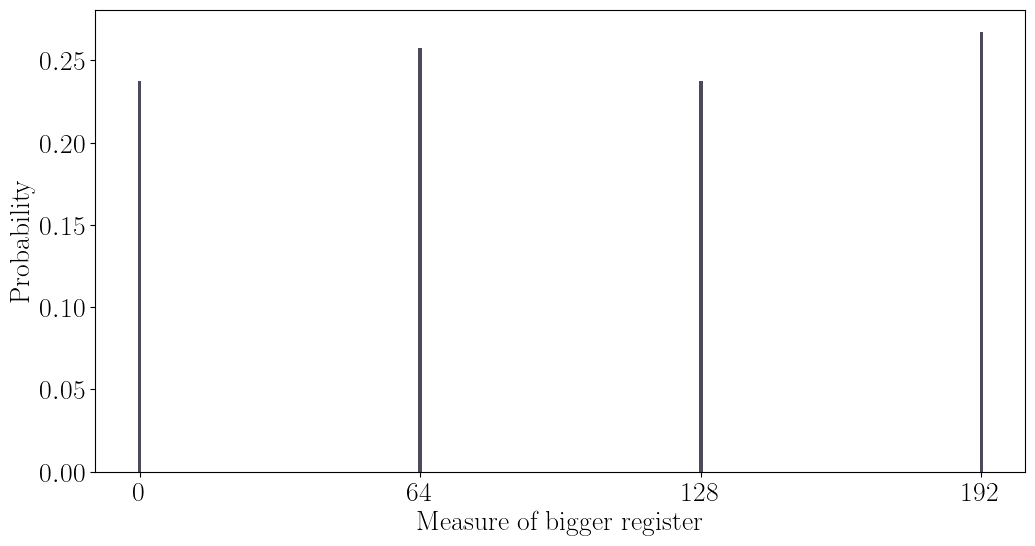

In [20]:
# N = 15, r = 4, y = 8, rep = 400
a = [0, 64, 128, 192]
js_3 =[0, 192, 192, 0, 0, 0, 64, 64, 0, 64, 64, 64, 192, 64, 0, 128, 64, 0, 192, 128, 0, 192, 192, 64, 192, 128, 128, 0, 64, 128, 192, 0, 192, 0, 192, 64, 64, 128, 128, 64, 0, 128, 64, 0, 128, 192, 128, 192, 192, 0, 0, 192, 64, 192, 192, 192, 128, 128, 192, 192, 192, 64, 128, 0, 192, 128, 192, 0, 64, 192, 0, 128, 128, 128, 128, 192, 128, 128, 192, 64, 0, 64, 0, 192, 0, 0, 128, 64, 128, 128, 192, 0, 0, 128, 0, 192, 128, 128, 192, 192, 128, 64, 0, 64, 64, 128, 192, 0, 0, 192, 192, 0, 128, 64, 0, 0, 192, 128, 128, 0, 192, 128, 0, 0, 0, 192, 128, 192, 128, 128, 192, 0, 0, 0, 128, 0, 192, 64, 128, 0, 0, 192, 0, 0, 64, 64, 64, 0, 128, 192, 64, 64, 0, 64, 64, 0, 192, 128, 64, 128, 192, 0, 192, 64, 128, 192, 0, 128, 128, 64, 64, 64, 192, 64, 64, 0, 128, 64, 0, 128, 0, 64, 128, 128, 64, 64, 64, 0, 0, 128, 192, 64, 0, 128, 128, 128, 192, 0, 192, 64, 64, 128, 192, 192, 192, 128, 64, 192, 64, 64, 128, 0, 192, 64, 64, 128, 0, 128, 0, 192, 0, 192, 192, 0, 128, 128, 0, 128, 64, 64, 128, 64, 0, 192, 64, 128, 0, 192, 64, 0, 192, 0, 128, 64, 192, 192, 0, 128, 128, 128, 128, 128, 128, 64, 128, 0, 192, 64, 192, 64, 192, 64, 128, 0, 0, 192, 0, 192, 0, 192, 192, 64, 192, 192, 128, 0, 0, 64, 64, 64, 64, 64, 64, 0, 128, 192, 192, 64, 192, 192, 64, 0, 64, 192, 128, 64, 64, 192, 64, 192, 0, 64, 64, 64, 128, 64, 64, 128, 192, 192, 192, 128, 64, 0, 0, 64, 0, 192, 192, 192, 192, 128, 0, 192, 64, 64, 0, 64, 192, 64, 64, 128, 192, 192, 128, 192, 192, 128, 64, 192, 0, 64, 192, 128, 128, 192, 128, 64, 128, 64, 0, 64, 128, 64, 192, 64, 0, 64, 64, 0, 128, 128, 0, 128, 0, 64, 128, 64, 192, 192, 0, 128, 192, 128, 64, 192, 64, 64, 0, 128, 128, 192, 192, 64, 0, 192, 192, 0, 192, 128, 192, 64, 0, 192, 128, 192, 0, 0, 64, 0]
rep = 400
hist = [95, 103, 95, 107]
bin_edges = [0, 64, 128, 192]

for l in range(len(hist)):
    hist[l] = hist[l]/ rep
    
plt.bar(bin_edges,hist, color = '#4C495A')
plt.xticks(bin_edges)
plt.xlabel('Measure of bigger register')
plt.ylabel('Probability')
#plt.show()

plt.savefig('Useful_js_div.pdf', format = 'pdf') 

[0.83761398 0.55695133 0.09655805]


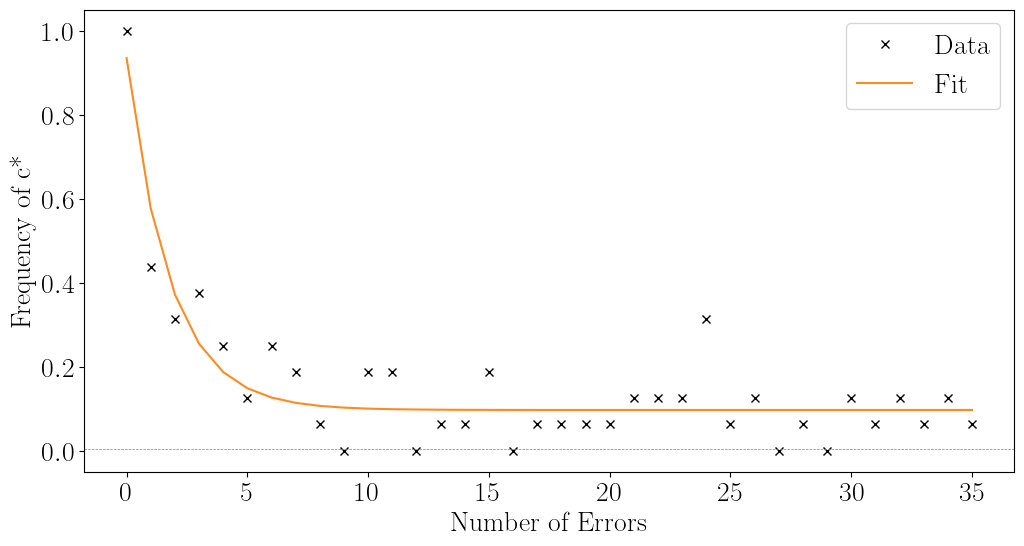

In [23]:
#N = 15
import scipy.optimize as opt
repetitions = 100
list = [[0, 16], [1, 7], [2, 5], [3, 6], [4, 4], [5, 2], [6, 4], [7, 3], [8, 1], [9, 0], [10, 3], [11, 3], [12, 0], [13, 1], [14, 1], [15, 3], [16, 0], [17, 1], [18, 1], [19, 1], [20, 1], [21, 2], [22, 2], [23, 2], [24, 5], [25, 1], [26, 2], [27, 0], [28, 1], [29, 0], [30, 2], [31, 1], [32, 2], [33, 1], [34, 2], [35, 1]]
plt.xlabel("Number of Errors")
plt.ylabel('Frequency of c*')

x=[]
y=np.zeros(36)

def func(x, a, b, c):
    x = np.array(x) 
    return a * np.exp(-b * x) + c

for i in range(len(list)):
    x.append(i)
    y[i]=list[i][1]/repetitions
    err = 1/math.sqrt(repetitions)
maxy = max(y)
y = y/maxy    
plt.plot(x,y, 'kx', label = 'Data')
    #plt.plot(list[i][0], list[i][1]/repetitions, 'kx')
    #plt.errorbar(list[i][0], list[i][1]/repetitions, err, ecolor='gray')


optimizedParameters15, pov15 = opt.curve_fit(func, x, y)
plt.plot(x, func(x, *optimizedParameters15), label="Fit", color = '#FB8B24')

plt.axhline(y=0.004, xmin=0, xmax=36, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('15.pdf', format = 'pdf') 
print(optimizedParameters15)

In [47]:
optimizedParameters15, pov15

(array([0.15139777, 1.17922579, 0.00928083]),
 array([[ 1.08225950e-04,  2.59501898e-04, -1.09244331e-05],
        [ 2.59501898e-04,  4.17756251e-02,  3.06782634e-04],
        [-1.09244331e-05,  3.06782634e-04,  1.20653816e-05]]))

[1.02615048 0.42919618 0.01414944]


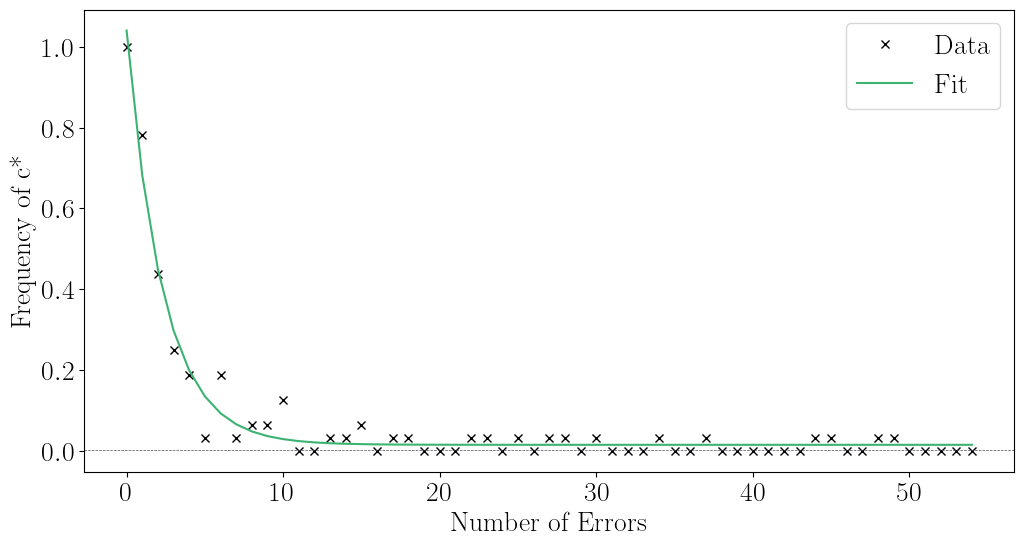

In [65]:
#N = 27 y = 8 n = 5 reps = 50, j useful counting
import scipy.optimize as opt
repetitions = 50
list = [[0, 32], [1, 25], [2, 14], [3, 8], [4, 6], [5, 1], [6, 6], [7, 1], [8, 2], [9, 2], [10, 4], [11, 0], [12, 0], [13, 1], [14, 1], [15, 2], [16, 0], [17, 1], [18, 1], [19, 0], [20, 0], [21, 0], [22, 1], [23, 1], [24, 0], [25, 1], [26, 0], [27, 1], [28, 1],        [29, 0], [30, 1], [31, 0], [32, 0], [33, 0], [34, 1], [35, 0], [36, 0], [37, 1], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 1], [45, 1], [46, 0], [47, 0], [48, 1], [49, 1], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0]]#[[0, 43], [1, 11], [2, 14], [3, 7], [4, 3], [5, 2], [6, 4], [7, 3], [8, 0], [9, 0], [10, 0], [11, 0], [12, 1], [13, 1], [14, 1], [15, 1], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 2],         [22, 1], [23, 0], [24, 2], [25, 0], [26, 0], [27, 1], [28, 1], [29, 0], [30, 0], [31, 1], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 1], [39, 2], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 1], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 2], [53, 1], [54, 0]]
plt.xlabel("Number of Errors")
plt.ylabel('Frequency of c*')

x=[]
y=np.zeros(55)

def func(x, a, b, c):
    x = np.array(x) 
    return a * np.exp(-b * x) + c

for i in range(len(list)):
    x.append(i)
    y[i]=list[i][1]/repetitions
    err = 1/math.sqrt(repetitions)

maxy = max(y)
y = y/maxy    
plt.plot(x, y, 'kx', label = 'Data')
    #plt.errorbar(list[i][0], list[i][1]/repetitions, err, ecolor='gray')
    
n = 5
ordinate = 1/2**(2*n)



optimizedParameters27, pov27 = opt.curve_fit(func, x, y)
plt.plot(x, func(x, *optimizedParameters27), label="Fit", color = '#3CB371')

plt.axhline(y=ordinate, xmin=0, xmax=55, color = '#4C495A', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('27.pdf', format = 'pdf') 
print(optimizedParameters27)

In [23]:
optimizedParameters27, pov27


(array([0.81049127, 0.82244085, 0.01226094]),
 array([[ 1.01799518e-03,  7.83146277e-04, -1.68828433e-05],
        [ 7.83146277e-04,  4.54635242e-03,  6.82425107e-05],
        [-1.68828433e-05,  6.82425107e-05,  2.09210553e-05]]))

In [29]:
from csv import reader
data = []
data0 = []
data55 = []

with open('FINAL27.txt', newline='') as f:
    first = 0
    last = 2751 
    line = 0
    for row in reader(f, delimiter='\t'):
        line += 1
        if line >= 2 and line <= last:
            data.append(row)

        if line >=2 and line <= 51:
            data0.append(row)
        if line >= 2072 and line <=  2751:
            data55.append(row)    

data_juseful = []
data_r = []
data_guesses = []
for row in data:
    data_guesses.append(row[6])
    data_r.append(row[4])
    data_juseful.append(row[3])
   

C:\Users\giuli\AppData\Local\Temp\ipykernel_2964\448480633.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(x, noise, ".", label="Data", color = '#4C495A', marker = 'x')
C:\Users\giuli\AppData\Local\Temp\ipykernel_2964\448480633.py:10: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


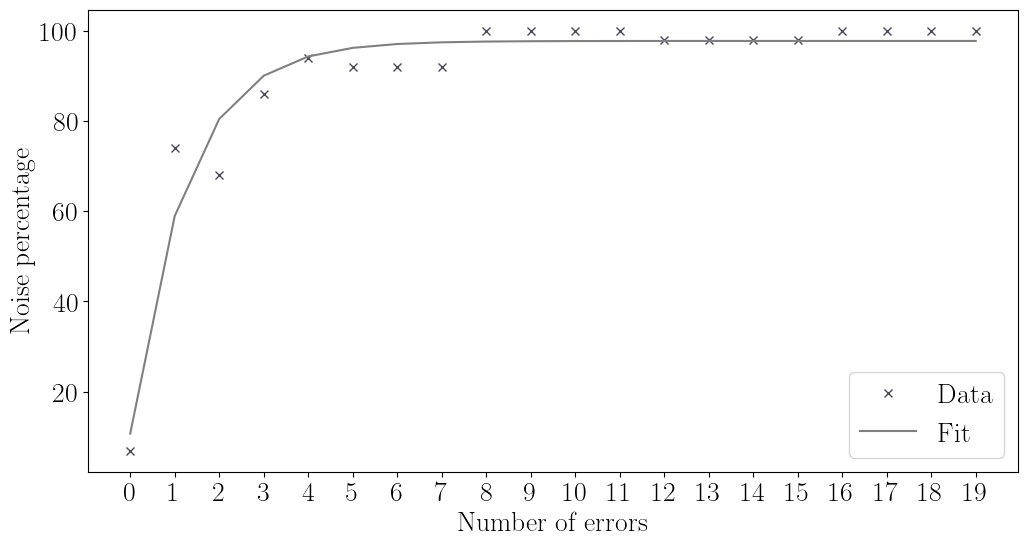

In [30]:
import scipy.optimize as opt
tmp = 20
c = [0, 171, 170, 342, 341, 512, 683, 682, 854, 853]
x = np.array(range(tmp))
noise = np.array(range(tmp))


def func(x, a, b, c):
    x = np.array(x) 
    return a * np.exp(-b * x) + c

for case in range(tmp):
    start = case*50
    stop = case*50 + 50
    
    sum = 0
    for i in range(start, stop, 1):
        for ii in range(len(c)):
            if int(data_juseful[i]) == c[ii]:
                sum = sum + 1
    noise[case] = ((1 - sum/50)*100)
    x[case] = case

plt.xlabel('Number of errors')
plt.ylabel('Noise percentage')
plt.xticks(x)
plt.plot(x, noise, ".", label="Data", color = '#4C495A', marker = 'x')

optimizedParameters, pov = opt.curve_fit(func, x, noise)
plt.plot(x, func(x, *optimizedParameters), label="Fit", color = 'gray')
plt.legend()
plt.savefig('noise.pdf', format = 'pdf') 

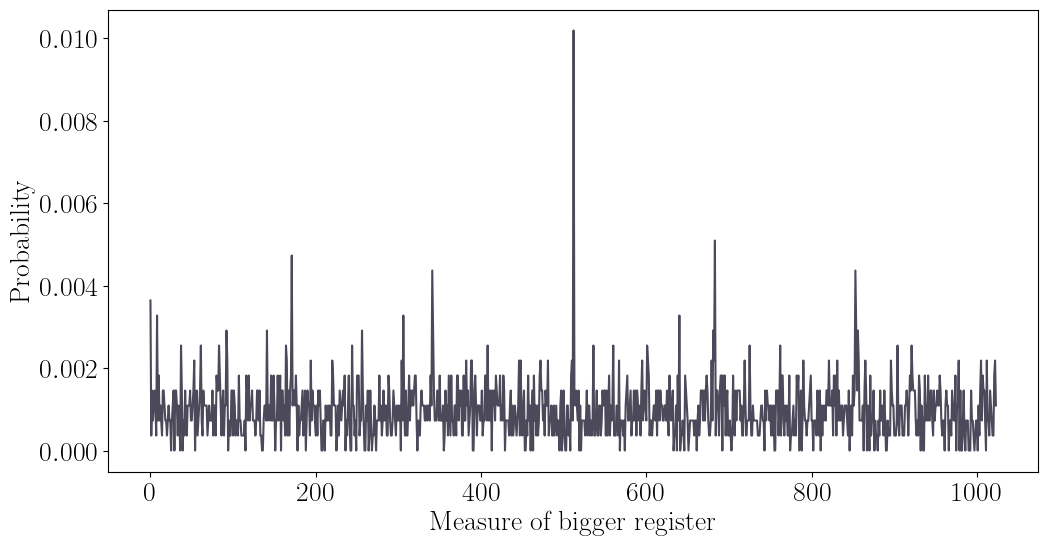

In [26]:
#N = 27 j_useful
n = 5
reps = 50*55
hist_juseful = np.zeros(2**(2*n))

for i in range(len(data_juseful)):
    for ii in range(2**(2*n)):
        if int(data_juseful[i]) == ii:
            hist_juseful[ii] += 1
plt.xlabel('Measure of bigger register')
plt.ylabel('Probability')
plt.plot(hist_juseful/reps, color = '#4C495A')
plt.savefig('Useful_js_div27.pdf', format = 'pdf') 

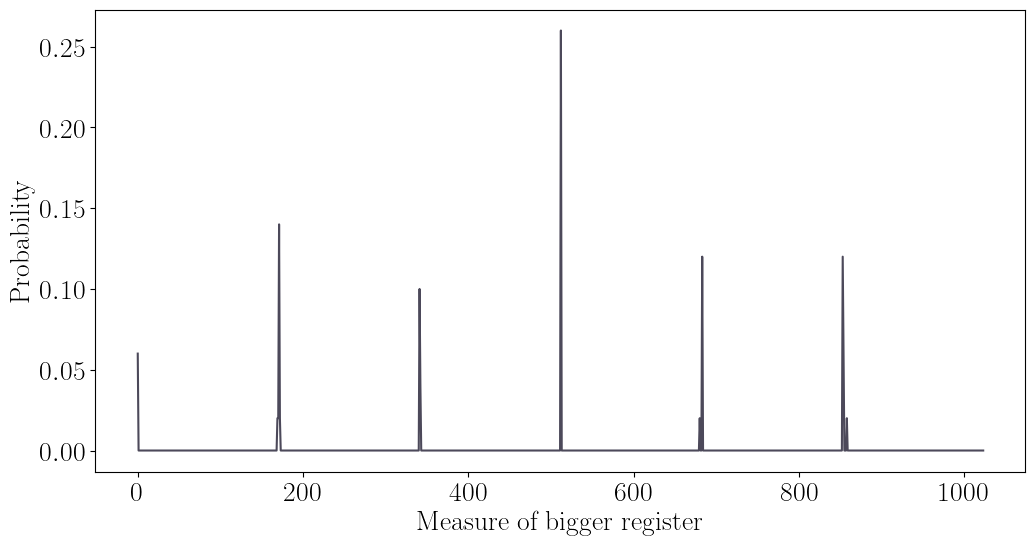

In [27]:
#N = 27 j_useful CASE WITHOUT ERRORS
data_juseful0 = []
for row in data0:
    data_juseful0.append(row[3])
n = 5
reps = 50

hist_juseful0 = np.zeros(2**(2*n))
for i in range(len(data_juseful0)):
    for ii in range(2**(2*n)):
        if int(data_juseful0[i]) == ii:
            hist_juseful0[ii] += 1
            
plt.xlabel('Measure of bigger register')
plt.ylabel('Probability')
plt.plot(hist_juseful0/reps, color = '#4C495A')
plt.savefig('Useful_js_div27_0.pdf', format = 'pdf') 



In [28]:
#NOISE EXTRACTION
c = [0, 171, 170, 342, 341, 512, 683, 682, 854, 853]
sum0 = 0
for i in range(len(hist_juseful0)):
    for ii in range(len(c)):
        if i == c[ii]:
            sum0 = sum0 + hist_juseful0[i]
print('%noise with 0 errors:', 1 - sum0/50)

%noise with 0 errors: 0.07999999999999996


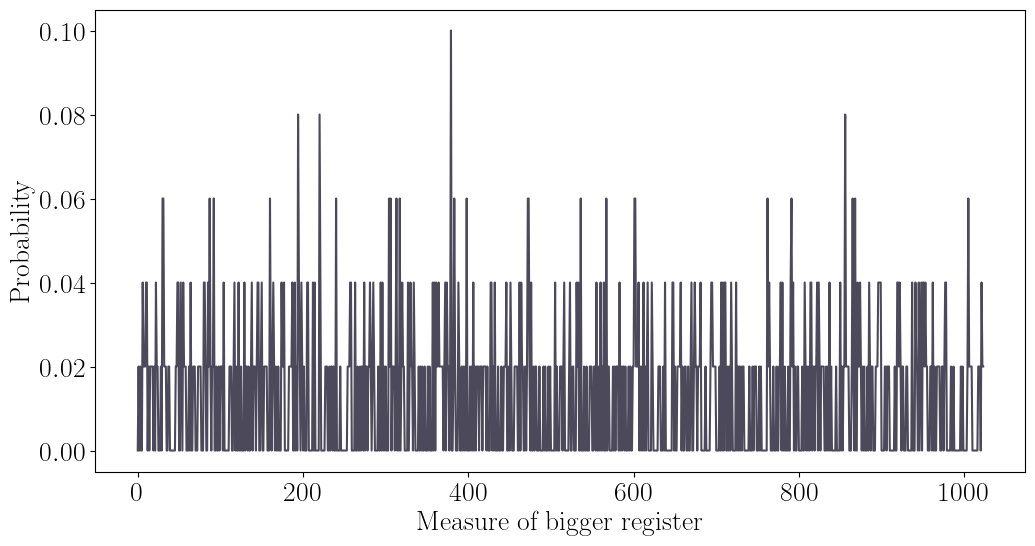

In [29]:
#N = 27 j_useful CASE WITHOUT ERRORS
data_juseful55 = []
for row in data55:
    data_juseful55.append(row[3])

n = 5
reps = 50
hist_juseful55 = np.zeros(2**(2*n))

for i in range(len(data_juseful55)):
    for ii in range(2**(2*n)):
        if int(data_juseful55[i]) == ii:
            hist_juseful55[ii] += 1
plt.xlabel('Measure of bigger register')
plt.ylabel('Probability')
plt.plot(hist_juseful55/reps, color = '#4C495A')
plt.savefig('Useful_js_div27_55.pdf', format = 'pdf') 

In [30]:
#NOISE EXTRACTION
c = [0, 171, 170, 342, 341, 512, 683, 682, 854, 853]
sum55 = 0
for i in range(len(hist_juseful55)):
    for ii in range(len(c)):
        if i == c[ii]:
            sum55 = sum55 + hist_juseful55[i]
print('%noise with 55 errors:', 1 - sum55/50)

%noise with 55 errors: 0.92


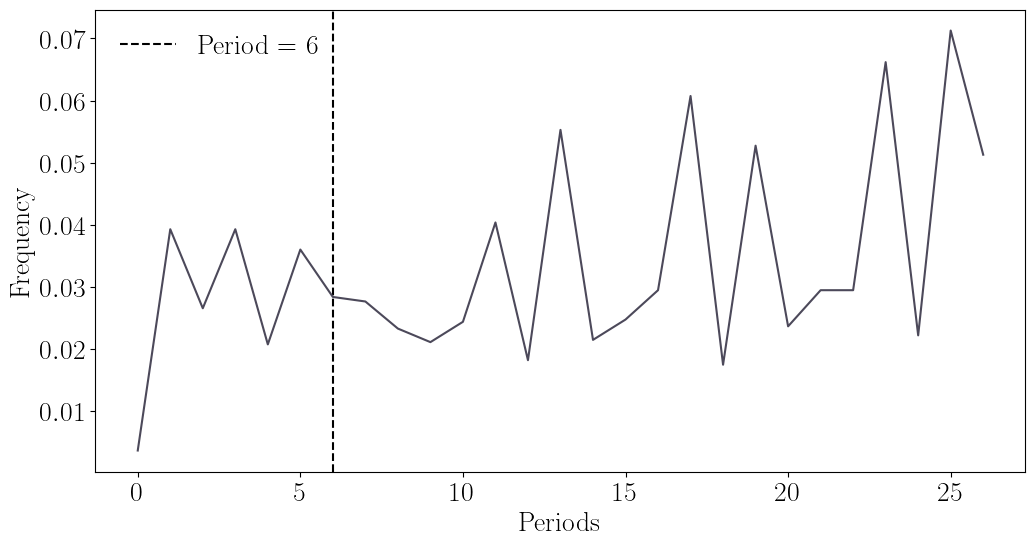

In [31]:
#N = 27 periods
N = 27
reps = 50*55
hist_r = np.zeros(N)

for i in range(len(data_r)):
    for ii in range(N):
        if int(data_r[i]) == ii:
            hist_r[ii] +=1
plt.xlabel("Periods")
plt.ylabel('Frequency')
plt.axvline(x = 6, color = 'black', label = 'Period = 6', linestyle='dashed')
plt.legend(frameon = False)
plt.plot(hist_r/reps, color = '#4C495A')
plt.savefig('27_r.pdf', format = 'pdf') 

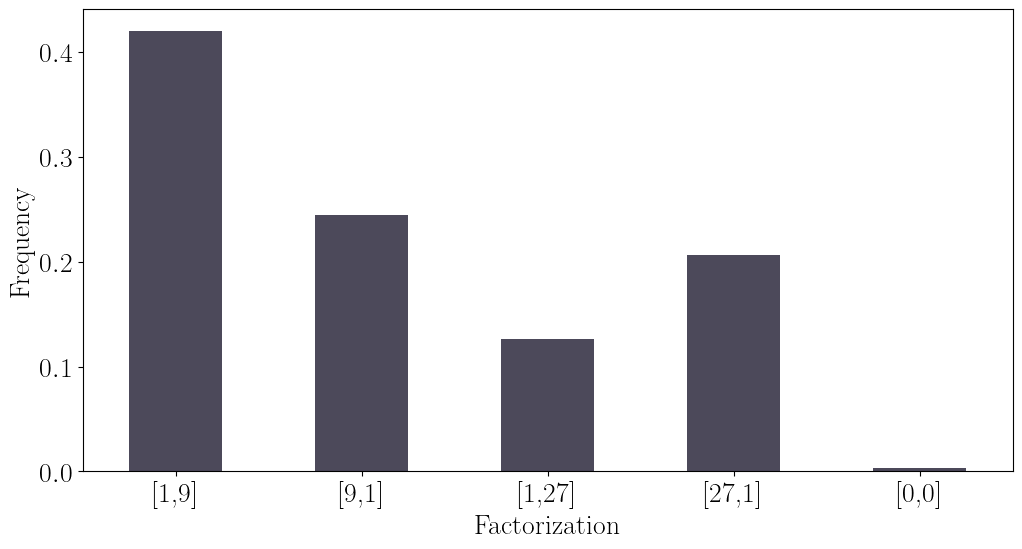

In [32]:
#N = 27 factorization

labels = [[1,9], [9,1], [1,27], [27,1], [0,0]]
reps = 50*55
hist_guesses = np.zeros(len(labels))
import ast
for i in range(len(data_guesses)):
    for ii in range(len(labels)):
        if ast.literal_eval(data_guesses[i]) == labels[ii]:
            hist_guesses[ii] += 1

freq_series = pd.Series(hist_guesses/reps)
names = ('[1,9]', '[9,1]', '[1,27]', '[27,1]',' [0,0]')

fig = freq_series.plot(kind='bar', color = '#4C495A')
fig.set_xlabel("Factorization")
fig.set_ylabel('Frequency')
fig.set_xticklabels(names, rotation = 0)
plt.savefig('27_guesses.pdf', format = 'pdf') 

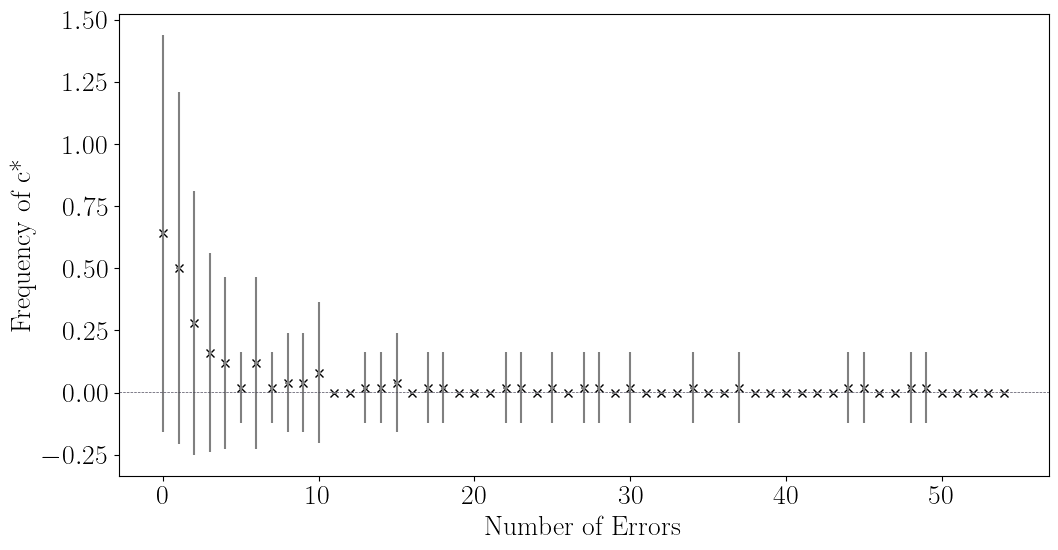

In [33]:
#N = 27 y = 8 n = 5 reps = 50, j useful counting, DIFFERENT POSITION
repetitions = 50
list = [[0, 32], [1, 25], [2, 14], [3, 8], [4, 6], [5, 1], [6, 6], [7, 1], [8, 2], [9, 2], [10, 4], [11, 0], [12, 0], [13, 1], [14, 1], [15, 2], [16, 0], [17, 1], [18, 1], [19, 0], [20, 0], [21, 0], [22, 1], [23, 1], [24, 0], [25, 1], [26, 0], [27, 1], [28, 1],        [29, 0], [30, 1], [31, 0], [32, 0], [33, 0], [34, 1], [35, 0], [36, 0], [37, 1], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 1], [45, 1], [46, 0], [47, 0], [48, 1], [49, 1], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0]]
plt.xlabel("Number of Errors")
plt.ylabel('Frequency of c*')

for i in range(len(list)):
    err = 1/math.sqrt(repetitions)
    plt.plot(list[i][0], list[i][1]/repetitions, 'kx')
    plt.errorbar( list[i][0], list[i][1]/repetitions,  math.sqrt(list[i][1]/repetitions), err, ecolor='gray')
n = 5
ordinate = 1/2**(2*n)

plt.axhline(y=ordinate, xmin=0, xmax=55, color = '#4C495A', linestyle='--', linewidth=0.5)
plt.savefig('27POS.pdf', format = 'pdf') 

In [34]:
dataPOS = []

with open('FINAL27_POS.txt', newline='') as f:
    first = 0
    last = 2751 
    line = 0
    for row in reader(f, delimiter='\t'):
        line += 1
        if line >= 2 and line <= last:
            dataPOS.append(row)

data_jusefulPOS = []
data_rPOS = []
data_guessesPOS = []
for row in dataPOS:
    data_guessesPOS.append(row[5])
    data_rPOS.append(row[3])
    data_jusefulPOS.append(row[2])

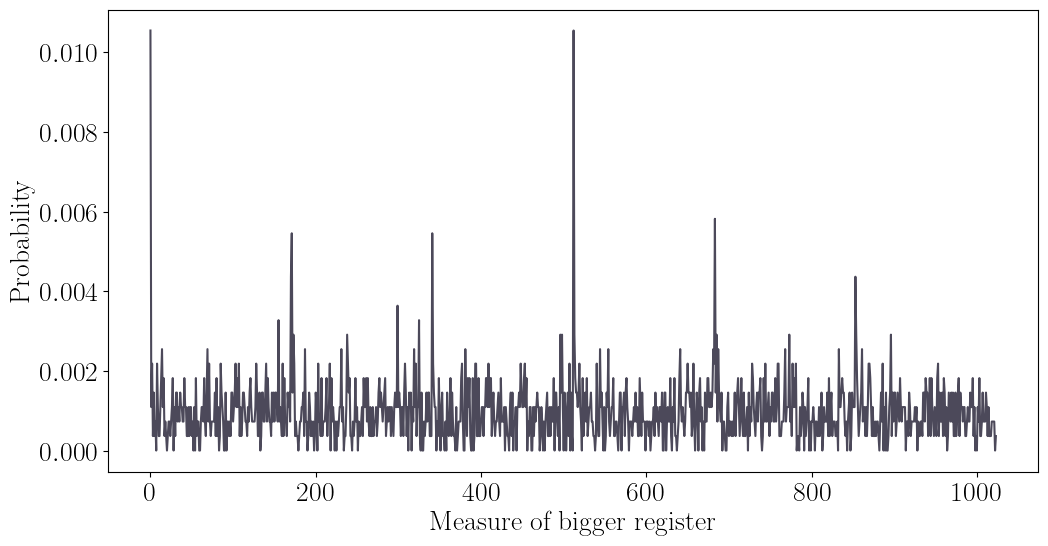

In [35]:
#N = 27 j_useful DIFFERENT POSITIONS
n = 5
reps = 50*55
hist_jusefulPOS = np.zeros(2**(2*n))

for i in range(len(data_jusefulPOS)):
    for ii in range(2**(2*n)):
        if int(data_jusefulPOS[i]) == ii:
            hist_jusefulPOS[ii] += 1
plt.xlabel('Measure of bigger register')
plt.ylabel('Probability')
plt.plot(hist_jusefulPOS/reps, color = '#4C495A')
plt.savefig('Useful_js_div27POS.pdf', format = 'pdf') 

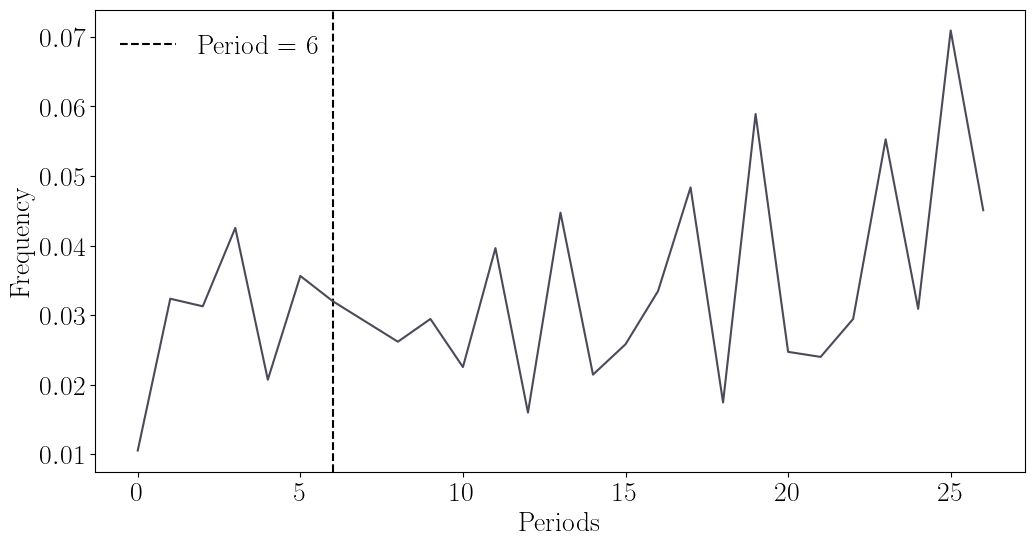

In [36]:
#N = 27 periods DIFFERENT POSITIONS
N = 27
reps = 50*55
hist_rPOS = np.zeros(N)

for i in range(len(data_rPOS)):
    for ii in range(N):
        if int(data_rPOS[i]) == ii:
            hist_rPOS[ii] +=1
plt.xlabel("Periods")
plt.ylabel('Frequency')
plt.axvline(x = 6, color = 'black', label = 'Period = 6', linestyle='dashed')
plt.legend(frameon = False)
plt.plot(hist_rPOS/reps, color = '#4C495A')
plt.savefig('27_rPOS.pdf', format = 'pdf') 

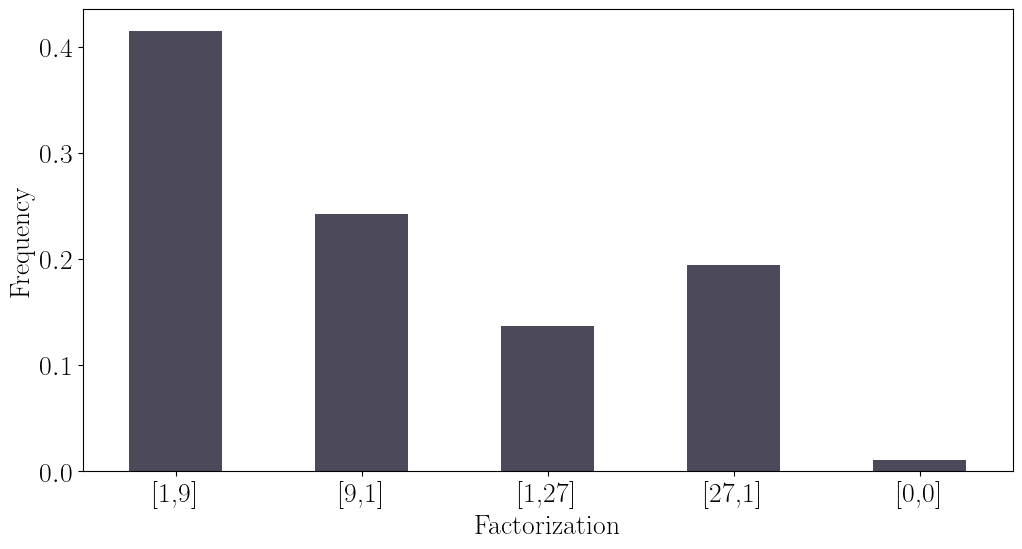

In [37]:
#N = 27 factorization  DIFFERENT POSITIONS

labels = [[1,9], [9,1], [1,27], [27,1], [0,0]]
reps = 50*55
hist_guessesPOS = np.zeros(len(labels))
import ast
for i in range(len(data_guessesPOS)):
    for ii in range(len(labels)):
        if ast.literal_eval(data_guessesPOS[i]) == labels[ii]:
            hist_guessesPOS[ii] += 1

freq_series = pd.Series(hist_guessesPOS/reps)
names = ('[1,9]', '[9,1]', '[1,27]', '[27,1]',' [0,0]')

fig = freq_series.plot(kind='bar', color = '#4C495A')
fig.set_xlabel("Factorization")
fig.set_ylabel('Frequency')
fig.set_xticklabels(names, rotation = 0)
plt.savefig('27_guessesPOS.pdf', format = 'pdf') 

In [46]:
import scipy.optimize as opt
useful_js_nodup63 = [2048, 682, 683, 2731, 2730, 1365, 1366, 3414, 3413]

def func(x, a, b, c):
    x = np.array(x) 
    return a * np.exp(-b * x) + c

data63 = []

with open('63_data_new.txt', newline='') as g:
    first = 0
    last = 3900
    line = 0
    for row in reader(g, delimiter='\t'):
        line += 1
        if line >= 1 and line <= last:
            data63.append(row)

data_juseful63 = []
data_case63 = []
for row in data63:
    data_case63.append(row[0])
    data_juseful63.append(row[2])



[1.00757159 0.60728833 0.00653507]


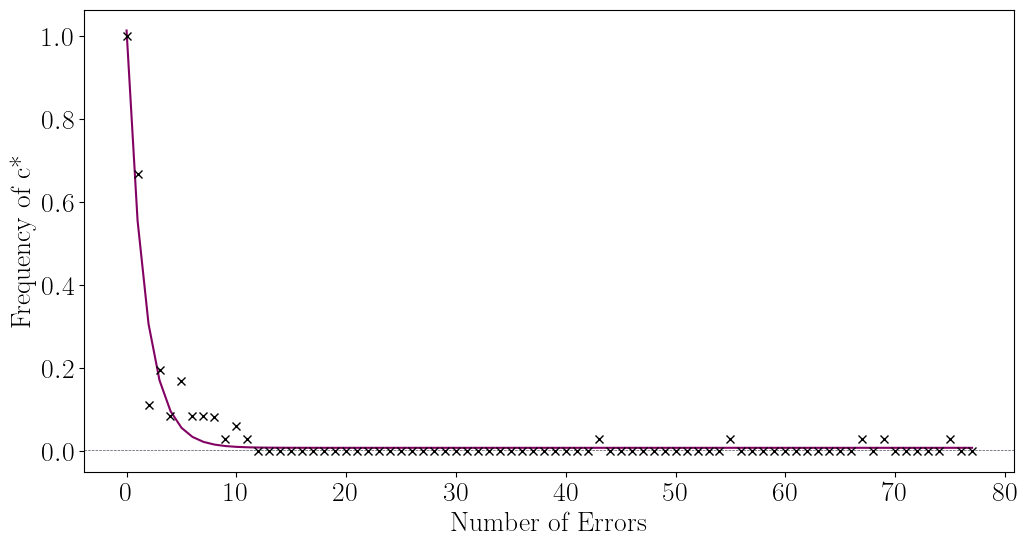

In [47]:

data_63final = np.zeros(78)
x = []
for l in range(78):
    x.append(l)

for i in range(len(data_case63)):
    actual_case = int(data_case63[i])
    for ii in range(len(useful_js_nodup63)):
        if (int( data_juseful63[i])) == useful_js_nodup63[ii]:
            data_63final[actual_case] = data_63final[actual_case]  +  1
            
plt.xlabel("Number of Errors")
plt.ylabel('Frequency of c*')    
n = 6
ordinate = 1/2**(2*n)
plt.axhline(y=ordinate, xmin=0, xmax=78, color = '#4C495A', linestyle='--', linewidth=0.5)     

data_63final = data_63final/78
max63 = max(data_63final)
data_63final = data_63final/max63
data_63final = [1.        , 0.66666667, 0.11111111, 0.19444444, 0.08333333,       0.16666667, 0.08333333, 0.08333333, 0.08        , 0.02777778,       0.06        , 0.02777778, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02777778, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02777778, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02777778, 0.        , 0.02777778,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02777778, 0.        , 0.        ]


optimizedParameters63, pov63 = opt.curve_fit(func, x, data_63final)
plt.plot(x, func(x, *optimizedParameters63), label="Fit", color = '#820263')   

plt.plot(x, data_63final,  'kx')

plt.savefig('63.pdf', format = 'pdf') 
print(optimizedParameters63)


In [26]:
data_63final = [1.        , 0.66666667, 0.11111111, 0.19444444, 0.08333333,       0.16666667, 0.08333333, 0.08333333, 0.08        , 0.02777778,       0.06        , 0.02777778, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02777778, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02777778, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02777778, 0.        , 0.02777778,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02777778, 0.        , 0.        ]

array([1.        , 0.66666667, 0.11111111, 0.19444444, 0.08333333,
       0.16666667, 0.08333333, 0.08333333, 0.        , 0.02777778,
       0.        , 0.02777778, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02777778, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02777778, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02777778, 0.        , 0.02777778,
       0.        , 0.        , 0.        , 0.        , 0.     

[-0.25295246 -0.35144059] [-0.40868366 -0.08880385] [-0.30882211 -0.58439486]


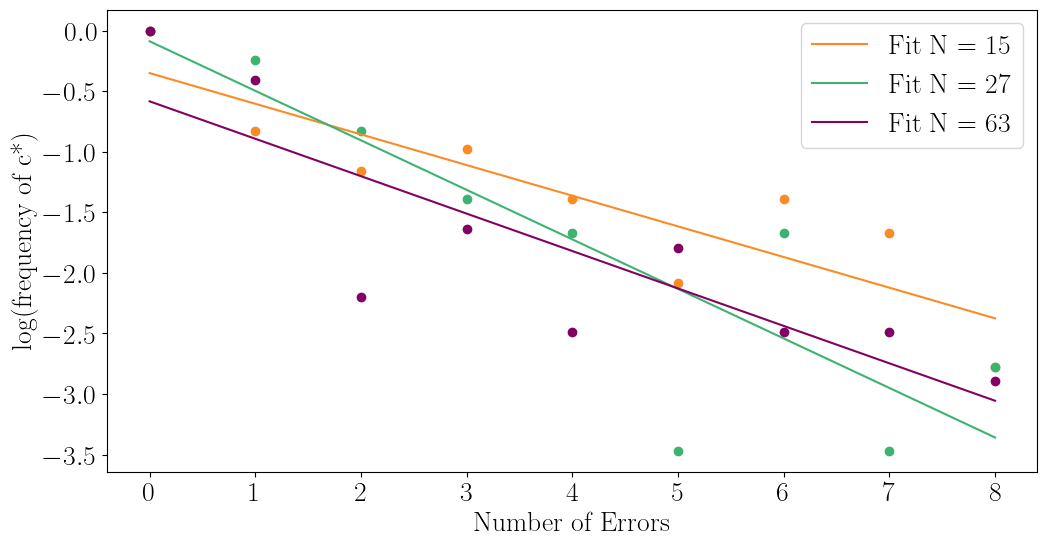

In [4]:

import pylab as plt
import scipy.optimize as opt
params = {'text.usetex' : True, 'font.size' : 20, 'font.family' : 'serif'}
plt.rcParams.update(params)
plt.rc('figure', figsize=(12, 6))

list15 = [[0, 16], [1, 7], [2, 5], [3, 6], [4, 4], [5, 2], [6, 4], [7, 3], [8, 1], [9, 0], [10, 3], [11, 3], [12, 0], [13, 1], [14, 1], [15, 3], [16, 0], [17, 1], [18, 1], [19, 1], [20, 1], [21, 2], [22, 2], [23, 2], [24, 5], [25, 1], [26, 2], [27, 0], [28, 1], [29, 0], [30, 2], [31, 1], [32, 2], [33, 1], [34, 2], [35, 1]]#[[0, 16], [3, 6], [6, 2], [9, 0], [12, 2], [15, 3], [18, 1], [21, 0], [24, 0], [27, 1], [30, 1], [33, 1]]
list27 = [[0, 32], [1, 25], [2, 14], [3, 8], [4, 6], [5, 1], [6, 6], [7, 1], [8, 2], [9, 2], [10, 4], [11, 0], [12, 0], [13, 1], [14, 1], [15, 2], [16, 0], [17, 1], [18, 1], [19, 0], [20, 0], [21, 0], [22, 1], [23, 1], [24, 0], [25, 1], [26, 0], [27, 1], [28, 1], [29, 0], [30, 1], [31, 0], [32, 0], [33, 0], [34, 1], [35, 0], [36, 0], [37, 1], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 1], [45, 1], [46, 0], [47, 0], [48, 1], [49, 1], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0]]
list63 = [36., 24.,  4.,  7.,  3.,  6.,  3.,  3.,  2.,  1.,  2.,  1.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,        0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]

def func(x, a, b):
    x = np.array(x) 
    return a*x + b

def exp_func(x, a, b, c):
    x = np.array(x)
    return a*np.exp(x) + c

def pot_law(x, a,b):
    x = np.array(x)
    return a*pow(x, b)

#cut sizes of 27 and 63
length_xs = 9
xs = []
prova15 = []
prova15_norm = np.zeros(length_xs)
prova27 = []
prova27_norm = np.zeros(length_xs)
prova63 = []
prova63_norm = np.zeros(length_xs)


for i in range(length_xs):
    xs.append(i)
    prova15.append(list15[i][1]/50)
    prova27.append(list27[i][1]/50)
    prova63.append(list63[i]/50)

for i in range(length_xs):
    max15 = max(prova15) 
    max27 = max(prova27) 
    max63 = max(prova63) 
    prova15_norm[i] = log(prova15[i]/max15)
    prova27_norm[i] = log(prova27[i]/max27)
    prova63_norm[i] = log(prova63[i]/max63)
    plt.scatter(xs[i], prova15_norm[i], color = '#FB8B24')
    plt.scatter(xs[i], prova27_norm[i], color = '#3CB371')
    plt.scatter(xs[i], prova63_norm[i], color = '#820263')


optimizedParameters15, pov15 = opt.curve_fit(func, xs, prova15_norm)
plt.plot(xs, func(xs, *optimizedParameters15), label="Fit N = 15", color = '#FB8B24')
optimizedParameters27, pov27 = opt.curve_fit(func, xs, prova27_norm)
plt.plot(xs, func(xs, *optimizedParameters27), label="Fit N = 27", color = '#3CB371')
optimizedParameters63, pov63 = opt.curve_fit(func, xs, prova63_norm)
plt.plot(xs, func(xs, *optimizedParameters63), label="Fit N = 63", color = '#820263')
#plt.yscale('log')
plt.xlabel("Number of Errors")
plt.ylabel('log(frequency of c*)')  
plt.legend()
plt.savefig('log.pdf', format = 'pdf') 
print(optimizedParameters15, optimizedParameters27, optimizedParameters63)



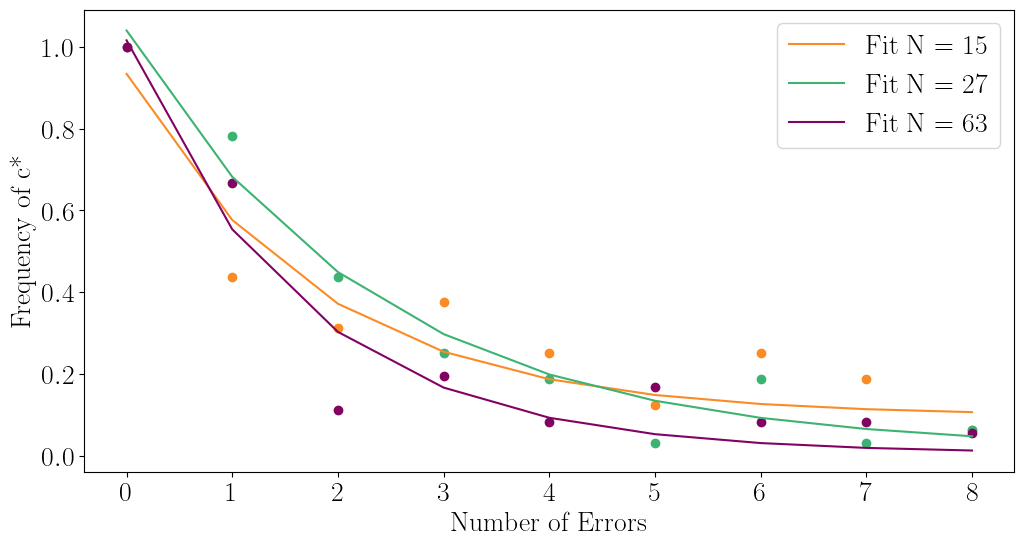

In [11]:
end_opt15 = [0.83761398, 0.55695133, 0.09655805]
end_opt27 = [1.02615048, 0.42919618, 0.01414944]#[0.94243089, 0.82243673, 0.01425683]
end_opt63 = [1.01144687, 0.61122386, 0.00476436]

def exp_func(x, a, b, c):
    x = np.array(x) 
    return a * np.exp(-b * x) + c

xs = []
for l in range(9):
    xs.append(l)

for i in range(length_xs):
    max15 = max(prova15) 
    max27 = max(prova27) 
    max63 = max(prova63) 
    prova15_norm[i] = prova15[i]/max15
    prova27_norm[i] = prova27[i]/max27
    prova63_norm[i] = prova63[i]/max63
    plt.scatter(xs[i], prova15_norm[i], color = '#FB8B24')
    plt.scatter(xs[i], prova27_norm[i], color = '#3CB371')
    plt.scatter(xs[i], prova63_norm[i], color = '#820263')

plt.plot(xs, exp_func(xs, *end_opt15), label="Fit N = 15", color = '#FB8B24')
plt.plot(xs, exp_func(xs, *end_opt27), label="Fit N = 27", color = '#3CB371')
plt.plot(xs, exp_func(xs, *end_opt63), label="Fit N = 63", color = '#820263')
plt.legend()
plt.xlabel("Number of Errors")
plt.ylabel('Frequency of c*')  
plt.savefig('exp.pdf')

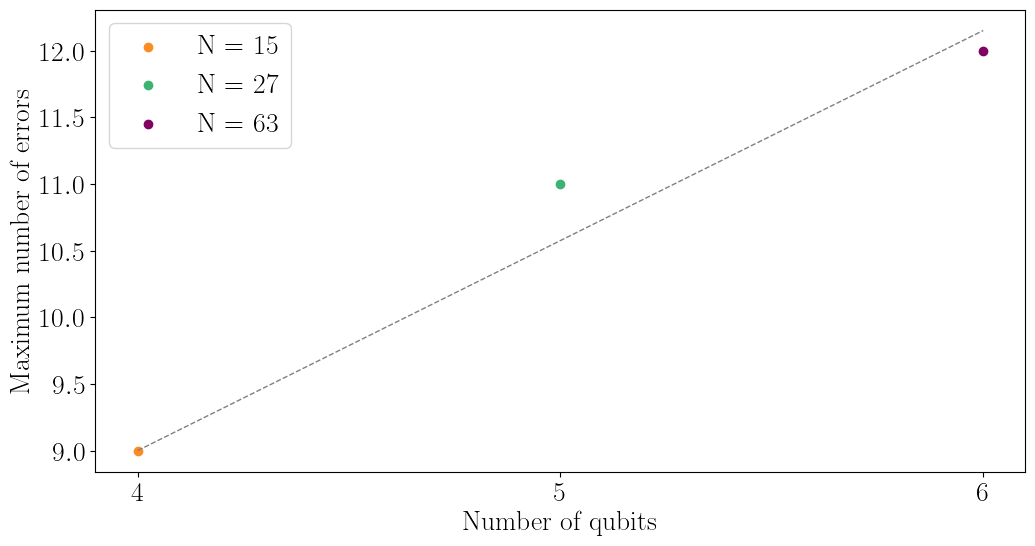

In [6]:
x = [4, 5, 6]
y = [9, 11, 12]
xline = [4, 6]
yline = [9, 12.15]
labels = [1,2,3]
xticks = [4,5,6]
plt.xticks(xticks)
plt.xlabel('Number of qubits')
plt.ylabel('Maximum number of errors')
plt.plot(xline, yline, linestyle='dashed',  linewidth=1, color = 'gray')
plt.scatter(x[0], y[0], color = '#FB8B24', label = 'N = 15')
plt.scatter(x[1], y[1], color = '#3CB371', label = 'N = 27')
plt.scatter(x[2], y[2], color = '#820263', label = 'N = 63')

plt.legend()
plt.savefig('conclusion.pdf')